### IMPORTING NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

from google.colab import drive
drive.mount('/content/gdrive')



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Mounted at /content/gdrive


### DATA LOADING

In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/iit_project/data/cleaned.csv")
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,format,category,title,brand,product_rank,book_length(pages),language
0,5,1,2015-04-21,A37LY77Q2YPJVL,B00W8HVAPC,Cathy Wilson,Add a little fun to your cooking with this low...,Guess I'm a Low Sugar Recipe Junkie!!,1429574400,Kindle Edition,"['Cookbooks, Food & Wine']",Low Sugar Recipes - 87 Sent From Recipe Heaven...,Visit Amazon's Recipe Junkies Page,213627.0,159.0,English
1,5,1,2018-02-03,A8IEC4NZ22RP4,B01BN5P64K,Amazon Customer,Rugby fans of any nation would find this an ex...,Thought provoking and honest.,1517616000,Kindle Edition,['Sports & Outdoors'],The Battle eBook,Visit Amazon's Paul O'Connell Page,557846.0,372.0,English
2,2,0,2014-12-18,A28TD9CK96RJY9,B00PB3BA2I,Terible T.,I love the Plob series and was thrilled to dis...,"Please I BEG YOU, hire an editor!",1418860800,Kindle Edition,['Literature & Fiction'],Plob Opens Doors - a humorous fantasy - Kindle...,Visit Amazon's Craig Zerf Page,1446527.0,133.0,English
3,4,1,2015-05-31,A1266LDU0YMC7R,B005XYEEY6,Johnantony,"Simple,elegant and so true....\nEasy to read a...",Start now and begin.,1433030400,Kindle Edition,['Religion & Spirituality'],"End Your Story, Begin Your Life: Wake Up, Let ...",Visit Amazon's Jim Dreaver Page,1198402.0,288.0,English
4,5,1,2018-03-22,A263R5ZQUSOJZ4,B00RJCQWPO,David C. Milchan,Holden and CeCe are content in their married l...,RU Serous is another exciting story in The Nas...,1521676800,Kindle Edition,['Literature & Fiction'],The Nashville Series - Book Eight - R U Seriou...,Visit Amazon's Inglath Cooper Page,27307.0,145.0,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13075,3,1,2014-08-25,AEINX8NF1SY35,B0034KYMSO,A. Pini,It may deserve a better rating as a normal boo...,It may deserve a better rating as a normal book,1408924800,Kindle Edition,['Reference'],Danish-English Dictionary &amp; Phrasebook (Hi...,Visit Amazon's Erna Maj Page,1930056.0,270.0,Multilingual
13076,4,1,2013-10-10,ADG0VLG1PACB2,B00F599TBC,gary,This is the authors version in Galego of his b...,Outra Idea de Galicia (Galego Edition),1381363200,Kindle Edition,['Politics & Social Sciences'],Outra idea de Galicia (Galician Edition) - Kin...,Miguel-Anxo Murado,2322652.0,126.0,Galician
13077,4,1,2014-09-03,A3OTZWRJMFPIKZ,B00GPSBNDY,Chucho Pulgoso,Calquera que tea pasado algn tempo en Santiago...,Esto Santiago,1409702400,Kindle Edition,"['Mystery, Thriller & Suspense']",TERRA DE CORVOS (Galician Edition) - Kindle ed...,Visit Amazon's Xan Reyes Page,3730409.0,152.0,Galician
13078,4,1,2015-03-10,AYPWO3RY4EG6U,B00M7HP0UO,Allan,Mae'r hanes yn da iawn gyda terfyniad yn syn,Jac,1425945600,Kindle Edition,"[""Children's eBooks""]",Jac (Welsh Edition) eBook,Guto Dafydd,4031218.0,91.0,Welsh


In [4]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])
df['year'] = df['reviewTime'].dt.year

# Group by year and count the number of rows
rows_per_year = df.groupby('year').size()

# Display the result
print(rows_per_year)

year
2013    1674
2014    3042
2015    3221
2016    2997
2017    1587
2018     559
dtype: int64


### EXPLORATORY DATA ANALYSIS

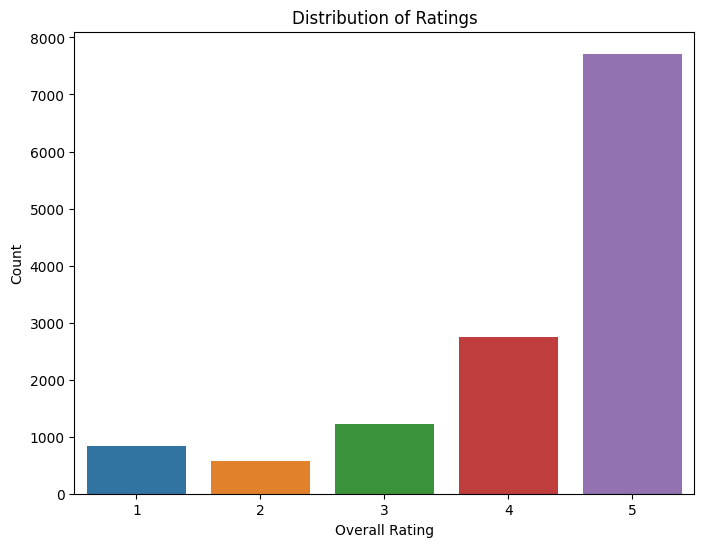

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='overall', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()



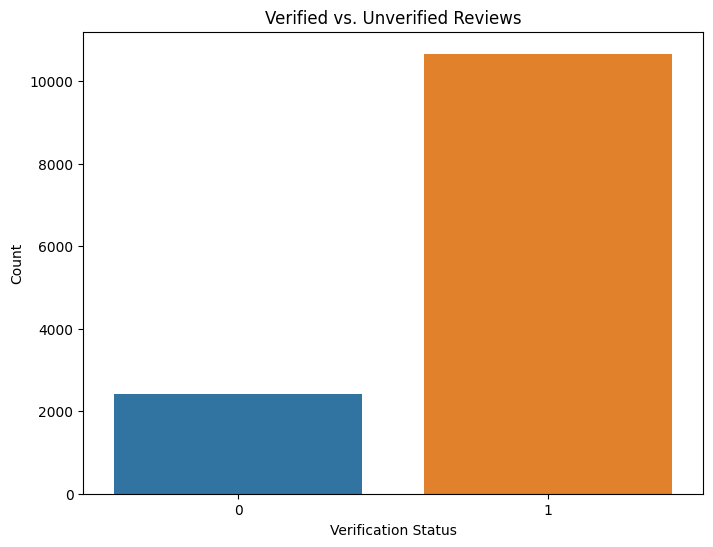

In [6]:
# 2. Verified vs. Unverified Reviews
plt.figure(figsize=(8, 6))
sns.countplot(x='verified', data=df)
plt.title('Verified vs. Unverified Reviews')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.show()



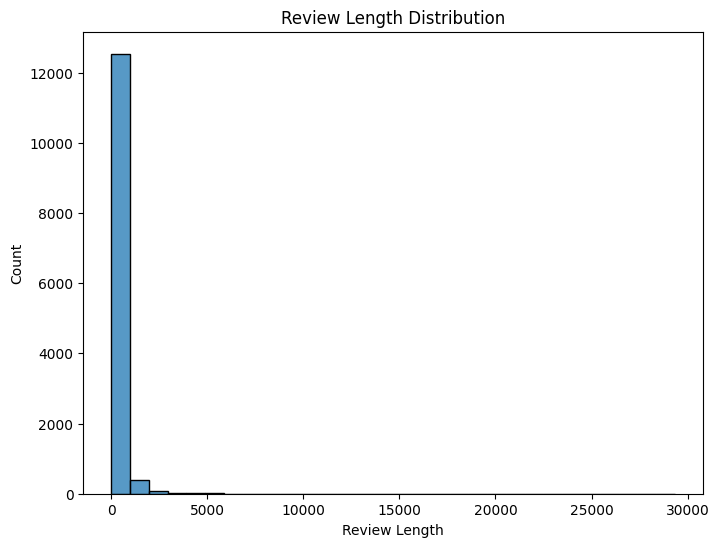

In [7]:
# 3. Review Length Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['reviewText'].apply(len), bins=30)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()


In [ ]:
#pip install transformers


### SENTIMENT ANALYSIS USING A PRETRAINED MODEL

In [ ]:
from transformers import pipeline


from tqdm import tqdm


# Selecting a pretrained model for calculating positive, negtaive and neutral sentiment scores of the reviews
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

# Creating a sentiment analysis pipeline
classifier = pipeline('sentiment-analysis', model=model_name,  return_all_scores=True)

# Function for sentiment analysis
def sentiment_analysis(row):
    scores = classifier(row['reviewText'], truncation=True)[0]
      # Extract the label and scores for the highest probability
    best_score = max(scores, key=lambda x: x['score'])
    return [best_score['label'], best_score['score']]

# Applying sentiment analysis to each row
tqdm.pandas()  # This is used for progress tracking
df['sentiment_results'] = df.progress_apply(sentiment_analysis, axis=1)

# Extracting sentiment label and score into separate columns
df[['sentiment_label', 'sentiment_score']] = pd.DataFrame(df['sentiment_results'].tolist(), index=df.index)

# Drop the temporary 'sentiment_results' column
df = df.drop('sentiment_results', axis=1)

# Display the updated DataFrame
print(df.head())


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
100%|██████████| 13080/13080 [40:39<00:00,  5.36it/s]

   overall  verified reviewTime      reviewerID        asin      reviewerName  \
0        5         1 2015-04-21  A37LY77Q2YPJVL  B00W8HVAPC      Cathy Wilson   
1        5         1 2018-02-03   A8IEC4NZ22RP4  B01BN5P64K   Amazon Customer   
2        2         0 2014-12-18  A28TD9CK96RJY9  B00PB3BA2I        Terible T.   
3        4         1 2015-05-31  A1266LDU0YMC7R  B005XYEEY6        Johnantony   
4        5         1 2018-03-22  A263R5ZQUSOJZ4  B00RJCQWPO  David C. Milchan   

                                          reviewText  \
0  Add a little fun to your cooking with this low...   
1  Rugby fans of any nation would find this an ex...   
2  I love the Plob series and was thrilled to dis...   
3  Simple,elegant and so true....\nEasy to read a...   
4  Holden and CeCe are content in their married l...   

                                             summary  unixReviewTime  \
0              Guess I'm a Low Sugar Recipe Junkie!!      1429574400   
1                      Thought p

In [ ]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,format,category,title,brand,product_rank,book_length(pages),language,year,sentiment_label,sentiment_score
0,5,1,2015-04-21,A37LY77Q2YPJVL,B00W8HVAPC,Cathy Wilson,Add a little fun to your cooking with this low...,Guess I'm a Low Sugar Recipe Junkie!!,1429574400,Kindle Edition,"['Cookbooks, Food & Wine']",Low Sugar Recipes - 87 Sent From Recipe Heaven...,Visit Amazon's Recipe Junkies Page,213627.0,159.0,English,2015,4 stars,0.503779
1,5,1,2018-02-03,A8IEC4NZ22RP4,B01BN5P64K,Amazon Customer,Rugby fans of any nation would find this an ex...,Thought provoking and honest.,1517616000,Kindle Edition,['Sports & Outdoors'],The Battle eBook,Visit Amazon's Paul O'Connell Page,557846.0,372.0,English,2018,5 stars,0.833714
2,2,0,2014-12-18,A28TD9CK96RJY9,B00PB3BA2I,Terible T.,I love the Plob series and was thrilled to dis...,"Please I BEG YOU, hire an editor!",1418860800,Kindle Edition,['Literature & Fiction'],Plob Opens Doors - a humorous fantasy - Kindle...,Visit Amazon's Craig Zerf Page,1446527.0,133.0,English,2014,2 stars,0.425789
3,4,1,2015-05-31,A1266LDU0YMC7R,B005XYEEY6,Johnantony,"Simple,elegant and so true....\nEasy to read a...",Start now and begin.,1433030400,Kindle Edition,['Religion & Spirituality'],"End Your Story, Begin Your Life: Wake Up, Let ...",Visit Amazon's Jim Dreaver Page,1198402.0,288.0,English,2015,5 stars,0.894870
4,5,1,2018-03-22,A263R5ZQUSOJZ4,B00RJCQWPO,David C. Milchan,Holden and CeCe are content in their married l...,RU Serous is another exciting story in The Nas...,1521676800,Kindle Edition,['Literature & Fiction'],The Nashville Series - Book Eight - R U Seriou...,Visit Amazon's Inglath Cooper Page,27307.0,145.0,English,2018,4 stars,0.468030


In [ ]:
df['sentiment_label'] = df['sentiment_label'].map({
    '5 stars': 'positive',
    '4 stars': 'positive',
    '3 stars': 'neutral',
    '2 stars': 'negative',
    '1 star': 'negative'
})

In [ ]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,format,category,title,brand,product_rank,book_length(pages),language,year,sentiment_label,sentiment_score
0,5,1,2015-04-21,A37LY77Q2YPJVL,B00W8HVAPC,Cathy Wilson,Add a little fun to your cooking with this low...,Guess I'm a Low Sugar Recipe Junkie!!,1429574400,Kindle Edition,"['Cookbooks, Food & Wine']",Low Sugar Recipes - 87 Sent From Recipe Heaven...,Visit Amazon's Recipe Junkies Page,213627.0,159.0,English,2015,positive,0.503779
1,5,1,2018-02-03,A8IEC4NZ22RP4,B01BN5P64K,Amazon Customer,Rugby fans of any nation would find this an ex...,Thought provoking and honest.,1517616000,Kindle Edition,['Sports & Outdoors'],The Battle eBook,Visit Amazon's Paul O'Connell Page,557846.0,372.0,English,2018,positive,0.833714
2,2,0,2014-12-18,A28TD9CK96RJY9,B00PB3BA2I,Terible T.,I love the Plob series and was thrilled to dis...,"Please I BEG YOU, hire an editor!",1418860800,Kindle Edition,['Literature & Fiction'],Plob Opens Doors - a humorous fantasy - Kindle...,Visit Amazon's Craig Zerf Page,1446527.0,133.0,English,2014,negative,0.425789
3,4,1,2015-05-31,A1266LDU0YMC7R,B005XYEEY6,Johnantony,"Simple,elegant and so true....\nEasy to read a...",Start now and begin.,1433030400,Kindle Edition,['Religion & Spirituality'],"End Your Story, Begin Your Life: Wake Up, Let ...",Visit Amazon's Jim Dreaver Page,1198402.0,288.0,English,2015,positive,0.894870
4,5,1,2018-03-22,A263R5ZQUSOJZ4,B00RJCQWPO,David C. Milchan,Holden and CeCe are content in their married l...,RU Serous is another exciting story in The Nas...,1521676800,Kindle Edition,['Literature & Fiction'],The Nashville Series - Book Eight - R U Seriou...,Visit Amazon's Inglath Cooper Page,27307.0,145.0,English,2018,positive,0.468030


In [ ]:
from google.colab import files

# Download the final Keywords CSV file to the local device

df.to_csv('amz_sentiment_data.csv', index=False)

files.download('amz_sentiment_data.csv')

In [6]:
keywords_df = pd.read_csv('/content/amz_sentiment_data.csv')

In [18]:
import spacy


# Load spaCy model
nlp = spacy.load("en_core_web_sm")



# Separate reviews based on sentiment labels
positive_reviews = keywords_df[keywords_df['sentiment_label'] == 'positive']['reviewText']
negative_reviews = keywords_df[keywords_df['sentiment_label'] == 'negative']['reviewText']
neutral_reviews = keywords_df[keywords_df['sentiment_label'] == 'neutral']['reviewText']

# Function to extract keywords from a given set of reviews
def extract_keywords(reviews):
    all_keywords = []
    for review in reviews:
        doc = nlp(review)
        # Remove stop words and punctuation, consider only nouns and adjectives
        tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and (token.pos_ == 'NOUN' or token.pos_ == 'ADJ')]
        all_keywords.extend(tokens)
    return all_keywords

# Extract keywords for each sentiment category
positive_keywords = extract_keywords(positive_reviews)
negative_keywords = extract_keywords(negative_reviews)
neutral_keywords = extract_keywords(neutral_reviews)

# Creating DataFrames for positive, negative, and neutral keywords
df_positive = pd.DataFrame(positive_keywords, columns=['Keyword'])
df_negative = pd.DataFrame(negative_keywords, columns=['Keyword'])
df_neutral = pd.DataFrame(neutral_keywords, columns=['Keyword'])

# Adding a "Sentiment" column to each DataFrame
df_positive['Sentiment'] = 'Positive'
df_negative['Sentiment'] = 'Negative'
df_neutral['Sentiment'] = 'Neutral'

# Concatenating DataFrames into a single DataFrame
df_combined = pd.concat([df_positive, df_negative, df_neutral], ignore_index=True)

# Display the final DataFrame
print(df_combined)


          Keyword Sentiment
0          little  Positive
1             fun  Positive
2         cooking  Positive
3             low  Positive
4           sugar  Positive
...           ...       ...
145140   practice   Neutral
145141       dime   Neutral
145142      novel   Neutral
145143  character   Neutral
145144  terfyniad   Neutral

[145145 rows x 2 columns]


In [19]:
from google.colab import files

# Download the final Keywords CSV file to the local device

df_combined.to_csv('keywords.csv', index=False)

files.download('keywords.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

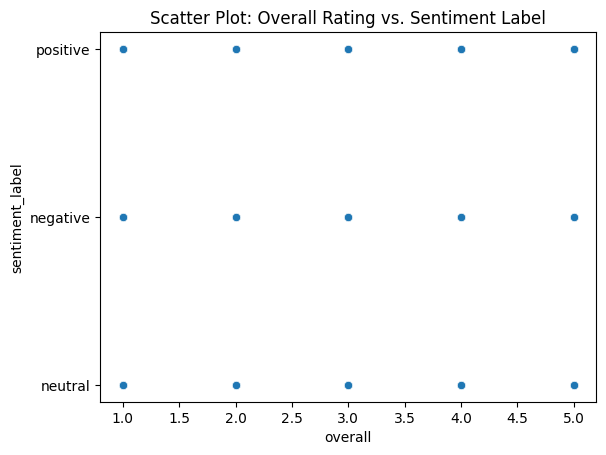

In [7]:


sns.scatterplot(x='overall', y='sentiment_label', data=keywords_df)
plt.title('Scatter Plot: Overall Rating vs. Sentiment Label')
plt.show()